# Trayectoría de Taxis

Importación de librerías

In [2]:
import warnings  
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor

from sklearn.externals import joblib



ModuleNotFoundError: No module named 'xgboost'

Lectura de dataset

In [1]:
import pandas as pd
df =  pd.read_csv(r"E:\Jupyter Files\data_mining\taxi-trajectory\train.csv")

Dimensiones del data set (número de registros, número de columnas)

In [2]:
df.shape


(1710670, 9)

Nombres de las columnas:

In [4]:
import datetime
df.columns


Index(['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID',
       'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE'],
      dtype='object')

Primeros 10 registros del dataset:

In [5]:
df.head(10)


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


Columnas cuyos registros son de tipo "Objeto"

In [2]:
df.dtypes[df.dtypes == 'object']


CALL_TYPE    object
DAY_TYPE     object
POLYLINE     object
dtype: object

Tipos de datos de cada columna

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
TRIP_ID         int64
CALL_TYPE       object
ORIGIN_CALL     float64
ORIGIN_STAND    float64
TAXI_ID         int64
TIMESTAMP       int64
DAY_TYPE        object
MISSING_DATA    bool
POLYLINE        object
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB


Mostrar detalles estadísticos básicos como percentil, media, estándar, etc. 

In [8]:
df.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.710670e+06,364770.000000,806579.000000,1.710670e+06,1.710670e+06
mean,1.388622e+18,24490.363018,30.272381,2.000035e+07,1.388622e+09
std,9.180944e+15,19624.290043,17.747840,2.112405e+02,9.180944e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.380731e+18,6593.000000,15.000000,2.000017e+07,1.380731e+09
50%,1.388493e+18,18755.000000,27.000000,2.000034e+07,1.388493e+09
75%,1.396750e+18,40808.000000,49.000000,2.000052e+07,1.396750e+09
max,1.404173e+18,63884.000000,63.000000,2.000098e+07,1.404173e+09


Mostrar detalles estadísticos cantidad, cuántos tipos, el registro de mayor frecuencia (top) y su frecuencia, de los registros de tipo "Object"

In [9]:
df.describe(include = ['object'])

,CALL_TYPE,DAY_TYPE,POLYLINE
count,1710670,1710670,1710670
unique,3,1,1703650
top,B,A,[]
freq,817881,1710670,5901


Ordenamiento de los registros por fecha ("TIMESTAMP"), luego adición de las columnas "year", "month", "month_day", "hour" y "week_day" extrayendo el año, mes, día del mes, hora y día de la semana.

In [5]:
df.sort_values('TIMESTAMP',inplace = True)
df['year'] = df['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).year)
df['month'] = df['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).month) 
df['month_day'] = df['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).day) 
df['hour'] = df['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).hour) 
df['week_day'] = df['TIMESTAMP'].apply(lambda x :datetime.datetime.fromtimestamp(x).weekday()) 

"Muestra" de los primeros 5 registros del dataset luego de las adiciones anteriores

In [11]:
df.head()


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,year,month,month_day,hour,week_day
577,1372636853620000380,C,NaN,NaN,20000380,1372636853,A,False,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,0,0
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,0,0
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,0,0
10,1372636875620000233,C,NaN,NaN,20000233,1372636875,A,False,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,0,0
64,1372636896620000360,C,NaN,NaN,20000360,1372636896,A,False,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,0,0


Creación de gráfico de torta para determinar el porcentaje de registros que pertenecen al año 2013 y el procentaje que pertenece al año 2014, 50.2 y 49.8 respectivamente.

([<matplotlib.patches.Wedge at 0x7fb8dd79be80>,
 [Text(-0.0067795454598015585, 1.0999791078758536, '2013'),
  Text(0.006779648447278292, -1.0999791072411018, '2014')],
 [Text(-0.0036979338871644856, 0.59998860429592, '50.2%'),
  Text(0.003697990062151795, -0.5999886039496919, '49.8%')])

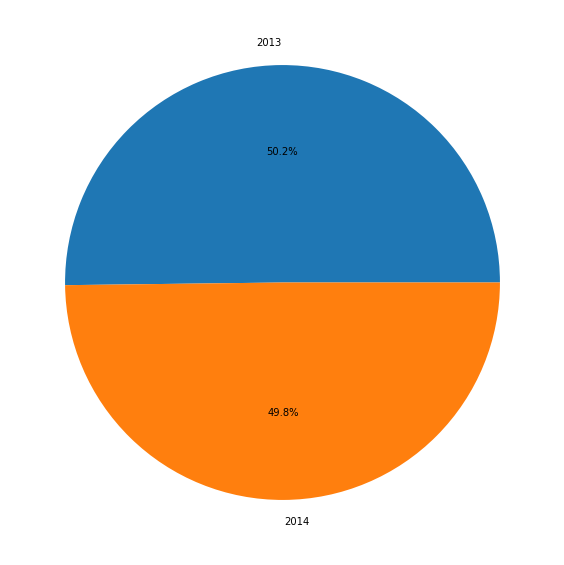

In [12]:
plt.figure(figsize = (10,10))
plt.pie(df['year'].value_counts(), labels = df['year'].value_counts().keys(),autopct = '%.1f%%')

Creación de gráfico de barras del número de viajes por días de la semana.

Text(0, 0.5, 'Day')

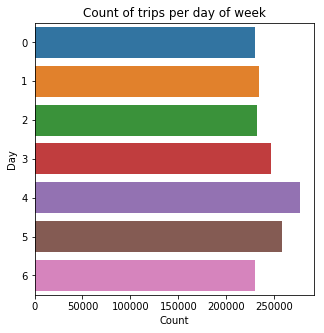

In [13]:
plt.figure(figsize = (5,5))
plt.title('Count of trips per day of week')
sns.countplot(y = 'week_day', data = df)
plt.xlabel('Count')
plt.ylabel('Day')

Creación de gráfico de barras del número de viajes por meses del año.

Text(0, 0.5, 'Month')

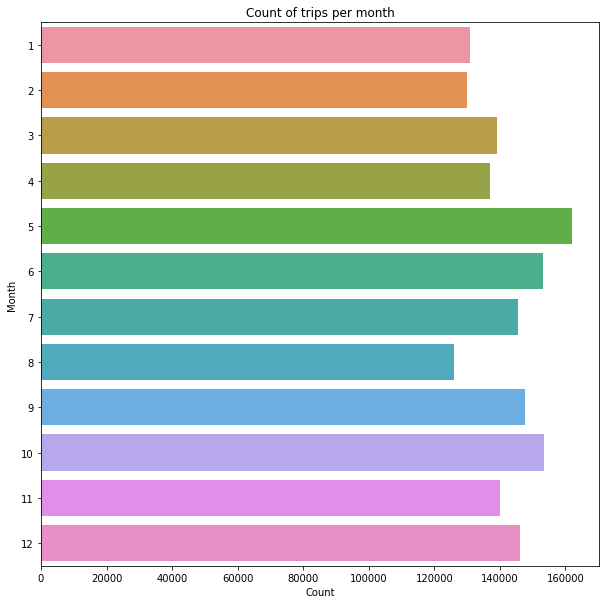

In [14]:
plt.figure(figsize = (10,10))
plt.title('Count of trips per month')
sns.countplot(y = 'month', data = df)
plt.xlabel('Count')
plt.ylabel('Month')

Creación de gráfico de barras del número de viajes por horas del día.

Text(0, 0.5, 'Hours')

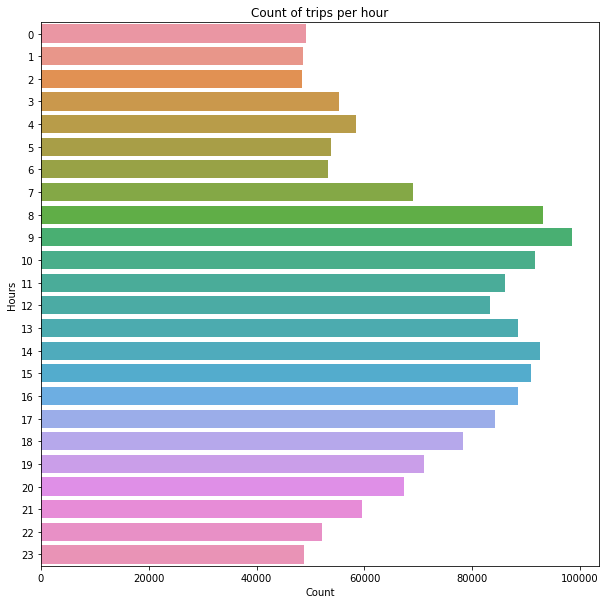

In [15]:
plt.figure(figsize = (10,10))
plt.title('Count of trips per hour')
sns.countplot(y = 'hour', data = df)
plt.xlabel('Count')
plt.ylabel('Hours')

Limpieza de datos no útiles para el procesamiento de información, y muestra del resultado final

In [6]:
df['MISSING_DATA'].value_counts()
# Eliminación de los datos marcados como "missing data" (datos perdidos) 
df.drop(df[df['MISSING_DATA'] == True].index, inplace = True)
df['MISSING_DATA'].unique()
# Eliminación de los datos cuyo registro "POLYLINE" se considera vacío
df[df['POLYLINE'] =='[]']['POLYLINE'].value_counts()
df.drop(df[df['POLYLINE'] =='[]']['POLYLINE'].index, inplace = True)
df[df['POLYLINE'] =='[]']['POLYLINE'].value_counts()
df['Polyline Length'] = df['POLYLINE'].apply(lambda x : len(eval(x))-1)
df['Trip Time(sec)'] = df['Polyline Length'].apply(lambda x : x * 15)
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,year,month,month_day,hour,week_day,Polyline Length,Trip Time(sec)
577,1372636853620000380,C,NaN,NaN,20000380,1372636853,A,False,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,8,0,24,360
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,8,0,42,630
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,8,0,22,330
10,1372636875620000233,C,NaN,NaN,20000233,1372636875,A,False,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,8,0,21,315
64,1372636896620000360,C,NaN,NaN,20000360,1372636896,A,False,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,8,0,42,630


Datos estadísticos del tiempo  de viaje en segundos

In [17]:
df['Trip Time(sec)'].describe()

count    1.704759e+06
mean     7.189021e+02
std      6.846122e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.000000e+02
75%      8.700000e+02
max      5.820000e+04
Name: Trip Time(sec), dtype: float64

Promedio de los registros agrupados por día de la semana

In [18]:
df.groupby('week_day').mean()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,MISSING_DATA,year,month,month_day,hour,Polyline Length,Trip Time(sec)
week_day,,,,,,,,,,,,
0,1.388541e+18,24266.902923,29.906836,2.000034e+07,1.388541e+09,False,2013.489873,6.645881,15.831436,12.701853,50.161472,752.422087
1,1.388354e+18,24255.076873,30.345652,2.000035e+07,1.388354e+09,False,2013.477034,6.738722,15.530936,12.381605,48.920652,733.809787
2,1.388374e+18,24085.274571,30.195455,2.000034e+07,1.388374e+09,False,2013.508033,6.373327,15.530086,12.670080,49.710429,745.656429
3,1.388607e+18,24016.681072,30.156901,2.000035e+07,1.388607e+09,False,2013.507242,6.469796,15.584794,12.470284,49.189870,737.848052
4,1.388760e+18,24240.138819,30.093780,2.000035e+07,1.388760e+09,False,2013.504146,6.551442,15.979771,12.654915,50.307077,754.606154
5,1.388724e+18,25431.411644,30.651643,2.000035e+07,1.388724e+09,False,2013.493629,6.677032,15.702651,10.976918,44.273390,664.100848
6,1.388954e+18,25552.079126,30.557114,2.000036e+07,1.388954e+09,False,2013.504626,6.660169,14.911438,9.511842,42.771202,641.568025


Número de registros con el campo "DAY_TYPE" nulo

In [7]:
df['DAY_TYPE'].isnull().sum()

0

Adición de columnas por cada tipo de llamada (CALL_TYPE), eliminado de duplicados y conteo de número de registros y columnas

In [8]:
df = pd.get_dummies(df, columns=['CALL_TYPE'])
df.shape
df = df.drop_duplicates()
print(df.shape)
df.to_csv('Cleaned_data.csv', index = None)

(1704757, 18)


In [9]:
df.head(5)

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,year,month,month_day,hour,week_day,Polyline Length,Trip Time(sec),CALL_TYPE_A,CALL_TYPE_B,CALL_TYPE_C
577,1372636853620000380,NaN,NaN,20000380,1372636853,A,False,"[[-8.610291,41.140746],[-8.6103,41.140755],[-8...",2013,7,1,8,0,24,360,0,0,1
3,1372636854620000520,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013,7,1,8,0,42,630,0,0,1
0,1372636858620000589,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013,7,1,8,0,22,330,0,0,1
10,1372636875620000233,NaN,NaN,20000233,1372636875,A,False,"[[-8.619894,41.148009],[-8.620164,41.14773],[-...",2013,7,1,8,0,21,315,0,0,1
64,1372636896620000360,NaN,NaN,20000360,1372636896,A,False,"[[-8.617599,41.146137],[-8.617581,41.14593],[-...",2013,7,1,8,0,42,630,0,0,1


#### Preparación de los datos para modelos de Machine Learning

In [21]:
df = df.iloc[:50000]
X = df[['Polyline Length', 'CALL_TYPE_A', 'CALL_TYPE_B', 'CALL_TYPE_C']]
y = df['Trip Time(sec)']
s = StandardScaler()
X = s.fit_transform(X)
print(np.mean(X))
np.std(X)

-6.821210263296962e-18


1.0

In [22]:
#### Train and Test splits : 70-30

In [23]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3)
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (35000, 4)
The size of training output is (35000,)
**************************************************
The size of testing input is (15000, 4)
The size of testing output is (15000,)


In [24]:
1. ### Machine Learning Models

1.0

In [25]:
k_range  =list(range(1,30)) 
param =dict(n_neighbors =k_range)
knn_regressor =GridSearchCV(KNeighborsRegressor(),param,cv =10)
knn_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:

print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')


{'n_neighbors': 2}

In [27]:

y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [28]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  25.991276008911694
R-squared:  0.9985989922812722


In [29]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 2

In [30]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


{'max_depth': 20}

In [31]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [32]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.0
R-squared:  1.0


In [33]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  47.26594968896743
R-squared:  0.9949158054169948
